<a href="https://colab.research.google.com/github/ITSKANISHKA/FakeNewsDetector/blob/main/fakeRealNewsDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy scikit-learn nltk seaborn matplotlib streamlit


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 18.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 45.7 MB/s eta 0:00:00


In [3]:
#loading the data
import pandas as pd
fake = pd.read_csv("Fake.csv", engine='python')
real = pd.read_csv("True.csv", engine='python')

In [4]:

fake['label'] = 0
real['label'] = 1

df = pd.concat([fake, real], axis=0).sample(frac=1).reset_index(drop=True)
df.head()

,title,text,subject,date,label
0,Ivanka Trump says world should boost women in ...,"TOKYO (Reuters) - Ivanka Trump, U.S. President...",worldnews,"November 3, 2017",1
1,Indian police ask interfaith couples: Is it lo...,"NEW DELHI/KOCHI, India (Reuters) - India s Sup...",worldnews,"November 26, 2017",1
2,"A Dallas Cop Just Filed Suit Against Obama, H...","A Dallas police officer, seeing red after seve...",News,"September 18, 2016",0
3,Boiler Room EP #128 – “Free Speech… Not Withou...,Tune in to the Alternate Current Radio Network...,Middle-east,"September 29, 2017",0
4,Trump set to name U.S. high court pick as Demo...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"January 30, 2017",1


In [5]:
#important libraries
import re, nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [7]:
nltk.download('stopwords')
nltk.download('wordnet')




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [8]:
#lemmitization
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [9]:
def clean_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text).lower().split()
    text = [lemmatizer.lemmatize(word) for word in text if word not in stop_words]
    return ' '.join(text)

df['clean_text'] = df['text'].apply(clean_text)

In [10]:
#TFIDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X = tfidf.fit_transform(df['clean_text'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

Accuracy: 0.9859688195991091
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4661
           1       0.98      0.99      0.99      4319

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



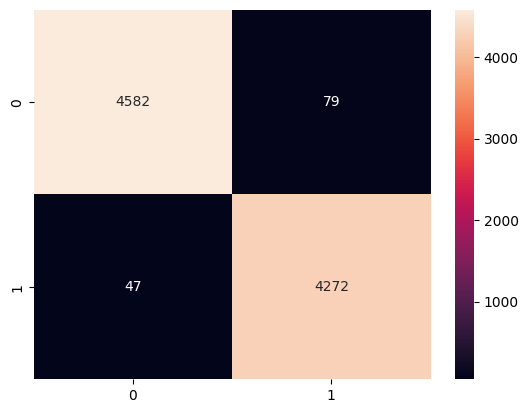

In [12]:
#training the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.show()

In [13]:
def predict_news(text):
    text = clean_text(text)
    vector = tfidf.transform([text])
    result = model.predict(vector)
    return "✅ Real News" if result[0]==1 else "🚫 Fake News"

print(predict_news("The Prime Minister announced a new policy today."))


🚫 Fake News
